# Imports

In [2]:
import cv2 as cv
import os
import matplotlib.pyplot as plt

%matplotlib inline

# Connecting to Webcam

In [4]:
# Establishing the connection to the capture device
cap = cv.VideoCapture(0)
# In my case, my mac webcame sits as device '0', this is different for different devices

In [5]:
# Get a frame from the capture device
ret, frame0 = cap.read()

In [6]:
# Check whether we captured the frame or not
print(ret)
print(frame0.shape)

True
(720, 1280, 3)


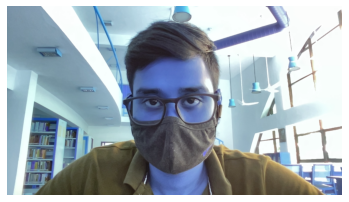

In [7]:
# Visualize the capture
plt.imshow(frame0)
plt.axis(False)
plt.show()

In [8]:
# Releases capture back into the wild
cap.release()

Note, that if there is a webcam indicator (or light), it will keep the connection on, till we release the device.

## A function to take photos!

In [11]:
webcampic_path = os.path.join('data','outputs','webcampic.jpg')
webcampic_path

'data/outputs/webcampic.jpg'

In [12]:
def take_photo():
    cap = cv.VideoCapture(0)
    ret, frame = cap.read()
    cv.imwrite(webcampic_path, frame)
    cap.release()

In [13]:
take_photo()

Here is the captured photo:

![webcampic](data/outputs/webcampic.jpg)

# Rendering in real time

In [15]:
# Establishing connection to webcam (video capture device)
cap = cv.VideoCapture(0)

# loop through every frame, while the webcam connection is open
while cap.isOpened():
    ret, frame = cap.read()

    # show live feed (image)
    cv.imshow('Live Webcam Feed' ,frame)

    # exit condition / breaking out of the loop
    k = cv.waitKey(1) # this checks whether or not we are hitting any key and accepts the stroke into the variable 'k'
    # keep this 25ms for smooth playback
    if k == ord('q'): # if we press 'q', we will exit (break out of the loop)
        break

# Releasing the video capture device
cap.release()

# Closing all the windows
cv.destroyAllWindows()
cv.waitKey(1)

-1

# Saving a Webcam feed

In [3]:
webcamfeed_op_path = os.path.join('data','outputs','webcamvid.avi')
webcamfeed_op_path

'data/outputs/webcamvid.avi'

### THIS IS STILL NOT WORKING! DEBUG THIS LATER!

In [4]:
# Establishing connection to webcam (video capture device)
cap = cv.VideoCapture(0)

# extracting video properties
height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
size = (width, height)
fps = int(cap.get(cv.CAP_PROP_FPS))
frame_count = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
fourcc = cv.VideoWriter_fourcc('a','v','c','1')
# for macos Monterey: I don't the codec to use
# So, for video writing I will be running colab

# Setting up the video writer object
video_writer = cv.VideoWriter(webcamfeed_op_path, fourcc, fps, size)

# loop through every frame, while the webcam connection is open
while cap.isOpened():
    ret, frame = cap.read()

    # show live feed (image)
    cv.imshow('Live Webcam Feed' ,frame)

    # write the video to disc
    video_writer.write(frame)

    # exit condition / breaking out of the loop
    k = cv.waitKey(1) # this checks whether or not we are hitting any key and accepts the stroke into the variable 'k'
    # keep this 25ms for smooth playback
    if k == ord('q'): # if we press 'q', we will exit (break out of the loop)
        break

# Releasing the video capture device
cap.release()

# Closing all the windows
cv.destroyAllWindows()
cv.waitKey(1)

-1

In [ ]:
%%time